# Import Necessary libaries


In [47]:
import pandas as pd
import numpy as np

In [48]:
players = pd.read_csv("players_22.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
features = ["overall" , "potential" , "wage_eur" , "value_eur" , "age"]


In [51]:
players = players.dropna(subset=features)


In [52]:
data = players[features].copy()

In [53]:
data = (data - data.min()) / (data.max() - data.min()) *9 + 1

In [60]:
def random_centroides(data , k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x : float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids , axis = 1)


In [61]:
def get_labels(data , centroids):
  distances = centroids.apply(lambda x : np.sqrt(((data - x) ** 2).sum(axis = 1)))
  return distances.idxmin(axis = 1)

In [62]:
def new_centroids(data , labesl, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [64]:
def plot_clusters(data , labels , centroids , iteration):
  pca = PCA(n_components = 2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()


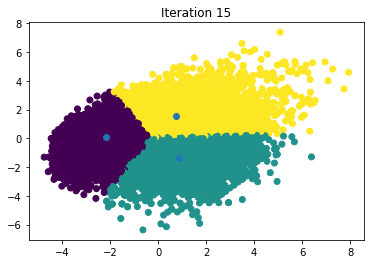

In [65]:
max_iterations = 100
centroid_count = 3

centroids = random_centroides(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1